In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.svm import SVC

In [3]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

#### Нормализация данных

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

In [6]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,29.699118,0,0,30.5000,0,0,1,1,0,0
885,0,25.000000,0,0,7.0500,0,0,1,0,0,1
248,1,24.000000,0,2,14.5000,0,0,1,0,1,0
479,0,22.000000,0,0,7.5208,0,0,1,0,0,1
306,0,0.920000,1,2,151.5500,0,0,1,1,0,0


In [8]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
cols_for_scal = ['Age','Fare','Parch','SibSp']

In [11]:
X_train[cols_for_scal]=scaler.fit_transform(X_train[cols_for_scal])

In [12]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,0.365120,0.069237,0.062126,0.062810,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,0.163483,0.148160,0.132598,0.100724,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.028107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.059532,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X_valid[cols_for_scal]=scaler.transform(X_valid[cols_for_scal])

In [14]:
X_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,0.376310,0.053812,0.068012,0.063003,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.163162,0.100208,0.139652,0.085059,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,0.005152,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.283740,0.000000,0.000000,0.015412,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.029758,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.447097,0.125000,0.166667,0.061155,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,0.886906,0.500000,0.833333,0.512122,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Сохранение и загрузка модели нормализации

In [17]:
#from sklearn.externals import joblib

In [19]:
#joblib.dumb(scaler,'min_max_scaler.plk')

In [20]:
#scaler=joblib.load('min_max_scaler.plk')

### SVC

In [21]:
clf = SVC()

In [22]:
clf.fit(X_train, y_train)

SVC()

In [23]:
y_pred =clf.predict(X_valid)

In [24]:
y_pred_train = clf.predict(X_train)

Оценим Accuracy

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_valid,y_pred)

0.8071748878923767

In [30]:
accuracy_score(y_train,y_pred_train)

0.8158682634730539

### Тюннинг модели SVC

In [31]:
c_vals = np.logspace(-2,5,29)
c_vals

array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.00000000e+05])

In [32]:
# Параметр C штрафует за ошибку классификации, по дефолту 1

In [34]:
accuracy_valid=[]
accuracy_train = []

for val in c_vals:
    clf = SVC(C=val)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    y_pred_train=clf.predict(X_train)
    acc_valid = accuracy_score(y_valid,y_pred)
    acc_train = accuracy_score(y_train,y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print(f'C={val}\n acc_valid={acc_valid}\n acc_train={acc_train}\n')
    

C=0.01
 acc_valid=0.600896860986547
 acc_train=0.6212574850299402

C=0.01778279410038923
 acc_valid=0.600896860986547
 acc_train=0.6212574850299402

C=0.03162277660168379
 acc_valid=0.7802690582959642
 acc_train=0.7889221556886228

C=0.05623413251903491
 acc_valid=0.7847533632286996
 acc_train=0.7979041916167665

C=0.1
 acc_valid=0.8071748878923767
 acc_train=0.812874251497006

C=0.1778279410038923
 acc_valid=0.8071748878923767
 acc_train=0.812874251497006

C=0.31622776601683794
 acc_valid=0.8071748878923767
 acc_train=0.812874251497006

C=0.5623413251903491
 acc_valid=0.8071748878923767
 acc_train=0.812874251497006

C=1.0
 acc_valid=0.8071748878923767
 acc_train=0.8158682634730539

C=1.7782794100389228
 acc_valid=0.8071748878923767
 acc_train=0.8158682634730539

C=3.1622776601683795
 acc_valid=0.8116591928251121
 acc_train=0.8158682634730539

C=5.623413251903491
 acc_valid=0.8161434977578476
 acc_train=0.8278443113772455

C=10.0
 acc_valid=0.8116591928251121
 acc_train=0.8338323353293

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

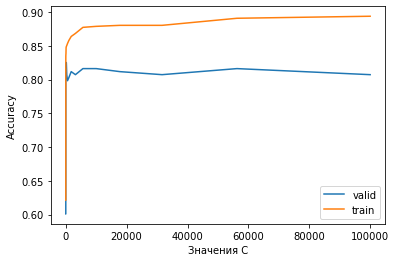

In [40]:
plt.plot(c_vals,accuracy_valid)
plt.plot(c_vals,accuracy_train)

plt.xlabel('Значения C')
plt.ylabel('Accuracy')
plt.legend(['valid','train'])